# Importing Libraries

In [29]:
import pandas as pd
import numpy as np

In [28]:
from sklearn.model_selection import train_test_split,cross_val_score

In [3]:
from sklearn import neighbors,preprocessing

In [47]:
from sklearn.metrics import classification_report,accuracy_score
import matplotlib.pyplot as plt

In [6]:
path = "C:/Users/Ansari Aaquib/Downloads/drive-download-20210519T143124Z-001/KNN/wheat.csv"

# Read the file

In [7]:
whey = pd.read_csv(path)

In [8]:
whey.head()

,area,perimeter,compactness,kernel_len,kernel_width,asym_coeff,kernel_groove,type
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [9]:
whey.tail()

,area,perimeter,compactness,kernel_len,kernel_width,asym_coeff,kernel_groove,type
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3
209,12.30,13.34,0.8684,5.243,2.974,5.637,5.063,3


In [10]:
whey.shape

(210, 8)

In [11]:
whey.type.value_counts()

1    70
2    70
3    70
Name: type, dtype: int64

# Standarized the dataset 

# make a copy

In [ ]:
w_std = whey.copy()

# use z-score and minmax transformation

In [17]:
minmax = preprocessing.MinMaxScaler()

In [18]:
sv = minmax.fit_transform(w_std.iloc[:,:])

In [19]:
w_std.iloc[:,:] = sv

In [20]:
w_std.head()

,area,perimeter,compactness,kernel_len,kernel_width,asym_coeff,kernel_groove,type
0,0.440982,0.502066,0.570780,0.486486,0.486101,0.189302,0.345150,0.0
1,0.405099,0.446281,0.662432,0.368806,0.501069,0.032883,0.215165,0.0
2,0.349386,0.347107,0.879310,0.220721,0.503920,0.251453,0.150665,0.0
3,0.306893,0.316116,0.793103,0.239302,0.533856,0.194243,0.140817,0.0
4,0.524079,0.533058,0.864791,0.427365,0.664291,0.076701,0.322994,0.0


In [21]:
whey.head()

,area,perimeter,compactness,kernel_len,kernel_width,asym_coeff,kernel_groove,type
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


# replace the y-variable with actual value

In [22]:
w_std.type = whey.type

# Shuffle the dataset

In [23]:
w_std = w_std.sample(frac=1)

In [24]:
w_std.head(20)

,area,perimeter,compactness,kernel_len,kernel_width,asym_coeff,kernel_groove,type
149,0.018886,0.107438,0.023593,0.235360,0.012830,0.610709,0.332349,3
107,0.664778,0.712810,0.652450,0.638514,0.672131,0.387718,0.694239,2
24,0.417375,0.485537,0.522686,0.501126,0.438346,0.133391,0.237322,1
26,0.229462,0.278926,0.508167,0.279279,0.282252,0.339089,0.150665,1
172,0.064212,0.115702,0.306715,0.106419,0.094797,0.460791,0.236829,3
148,0.199245,0.268595,0.372051,0.274212,0.200285,0.324396,0.392418,3
140,0.234183,0.311983,0.362069,0.322635,0.259444,0.590165,0.431315,3
124,0.509915,0.512397,0.892015,0.261261,0.678546,0.334278,0.307730,2
64,0.206799,0.239669,0.576225,0.204392,0.282252,0.053427,0.129493,1
119,0.891407,0.927686,0.662432,0.897523,0.874555,0.298782,0.886755,2


# Split the data into train and test

In [25]:
trainx,testx,trainy,testy = train_test_split(w_std.drop('type',1),w_std.type,test_size=0.2)

In [26]:
trainx.shape,trainy.shape

((168, 7), (168,))

In [27]:
testx.shape,testy.shape

((42, 7), (42,))

# Perform cross-validation to get the best k value

In [30]:
n_list = np.arange(3,12,2)

In [31]:
print(n_list)

[ 3  5  7  9 11]


# store the accuracy of model for each k value

In [32]:
cv_acc = []
for k in n_list:
    model = neighbors.KNeighborsClassifier(n_neighbors=k)
    acc = cross_val_score(model,trainx,trainy,cv=5,scoring='accuracy')
    acc = np.round(np.mean(acc),3)
    cv_acc.append(acc)

In [33]:
print(cv_acc)

[0.929, 0.923, 0.911, 0.916, 0.905]


# select the best k

In [34]:
max(cv_acc)

0.929

In [41]:
optk = n_list[cv_acc.index(max(cv_acc))]

In [42]:
print('best k value = ', optk)

best k value =  3


# plot the accuracy - neighbours

Text(0.5, 1.0, 'Selection of optimal k for KNN')

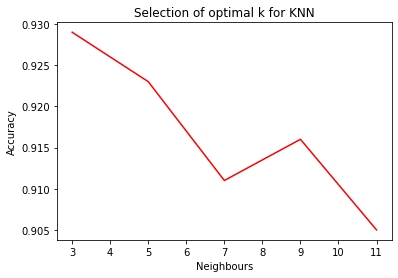

In [40]:
plt.plot(n_list,cv_acc,color='red')
plt.xlabel('Neighbours')
plt.ylabel('Accuracy')
plt.title('Selection of optimal k for KNN')

# Build the KNN model and predict

In [44]:
m1 = neighbors.KNeighborsClassifier(n_neighbors=optk).fit(trainx,trainy)

In [45]:
p1 = m1.predict(testx)

# model accuracy

In [48]:
print('Accuracy', accuracy_score(testy,p1))

Accuracy 0.9523809523809523


# Confusion matrix and classification report

In [49]:
df1 = pd.DataFrame({'actual':testy,'predicted':p1})
pd.crosstab(df1.actual,df1.predicted,margins=True)
print(classification_report(df1.actual,df1.predicted))

              precision    recall  f1-score   support

           1       0.93      0.93      0.93        14
           2       1.00      0.93      0.96        14
           3       0.93      1.00      0.97        14

    accuracy                           0.95        42
   macro avg       0.95      0.95      0.95        42
weighted avg       0.95      0.95      0.95        42



In [75]:
whey = whey.sample(frac=1)
whey.head(20)

,area,perimeter,compactness,kernel_len,kernel_width,asym_coeff,kernel_groove,type
83,19.57,16.74,0.8779,6.384,3.772,1.472,6.273,2
159,11.49,13.22,0.8263,5.304,2.695,5.388,5.310,3
37,17.08,15.38,0.9079,5.832,3.683,2.956,5.484,1
199,12.76,13.38,0.8964,5.073,3.155,2.828,4.830,3
69,12.73,13.75,0.8458,5.412,2.882,3.533,5.067,1
90,20.10,16.99,0.8746,6.581,3.785,1.955,6.449,2
119,20.03,16.90,0.8811,6.493,3.857,3.063,6.320,2
165,12.10,13.15,0.8793,5.105,2.941,2.201,5.056,3
193,10.82,12.83,0.8256,5.180,2.630,4.853,5.089,3
45,13.80,14.04,0.8794,5.376,3.155,1.560,4.961,1


In [76]:
trainx,testx,trainy,testy = train_test_split(whey.drop('type',1),whey.type,test_size=0.3)

In [77]:
trainx.shape,trainy.shape

((147, 7), (147,))

In [78]:
testx.shape,testy.shape

((63, 7), (63,))

In [79]:
n_list = np.arange(3,12,2)
print(n_list)

[ 3  5  7  9 11]


In [91]:
cv_acc1 = []
for k in n_list:
    model1 = neighbors.KNeighborsClassifier(n_neighbors=k,metric='manhattan')
    acc1 = cross_val_score(model1,trainx,trainy,cv=5,scoring='accuracy')
    acc1 = np.round(np.mean(acc1),3)
    cv_acc1.append(acc1)

In [92]:
max(cv_acc1)

0.897

In [93]:
optk1 = n_list[(cv_acc1.index(max(cv_acc1)))]

In [94]:
print("best k",optk1)

best k 3


Text(0.5, 1.0, 'Selection of optimal k for KNN')

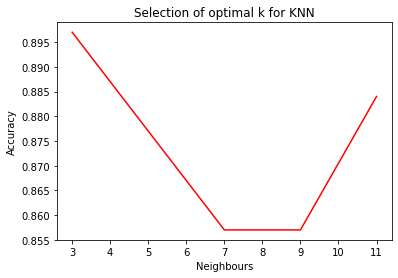

In [95]:
plt.plot(n_list,cv_acc1,color='red')
plt.xlabel('Neighbours')
plt.ylabel('Accuracy')
plt.title('Selection of optimal k for KNN')

In [105]:
m2 = neighbors.KNeighborsClassifier(n_neighbors=optk1,metric='euclidean').fit(trainx,trainy)

In [106]:
p2 = m2.predict(testx)

In [107]:
print('Accuracy', accuracy_score(testy,p2))

Accuracy 0.9365079365079365


In [89]:
help(neighbors.KNeighborsClassifier)

Help on class KNeighborsClassifier in module sklearn.neighbors._classification:

class KNeighborsClassifier(sklearn.neighbors._base.KNeighborsMixin, sklearn.base.ClassifierMixin, sklearn.neighbors._base.NeighborsBase)
 |  KNeighborsClassifier(n_neighbors=5, *, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None, **kwargs)
 |  
 |  Classifier implementing the k-nearest neighbors vote.
 |  
 |  Read more in the :ref:`User Guide <classification>`.
 |  
 |  Parameters
 |  ----------
 |  n_neighbors : int, default=5
 |      Number of neighbors to use by default for :meth:`kneighbors` queries.
 |  
 |  weights : {'uniform', 'distance'} or callable, default='uniform'
 |      weight function used in prediction.  Possible values:
 |  
 |      - 'uniform' : uniform weights.  All points in each neighborhood
 |        are weighted equally.
 |      - 'distance' : weight points by the inverse of their distance.
 |        in this case, closer ne